Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Procjena parametara

*Verzija: 1.0
Zadnji put ažurirano: 1. listopada 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **19. prosinca 2021. u 23:59h**

------------------------------

### Upute

Ova laboratorijska vježba sastoji se od tri zadatka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [255]:
# Učitaj osnovne biblioteke...
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
#import pgmpy as pgm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'beta', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### 1. Procjena maksimalne izglednosti

#### (a)

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [256]:
def L(mu, N, m):
    return (mu**m)*(1-mu)**(N-m)

#### (b)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

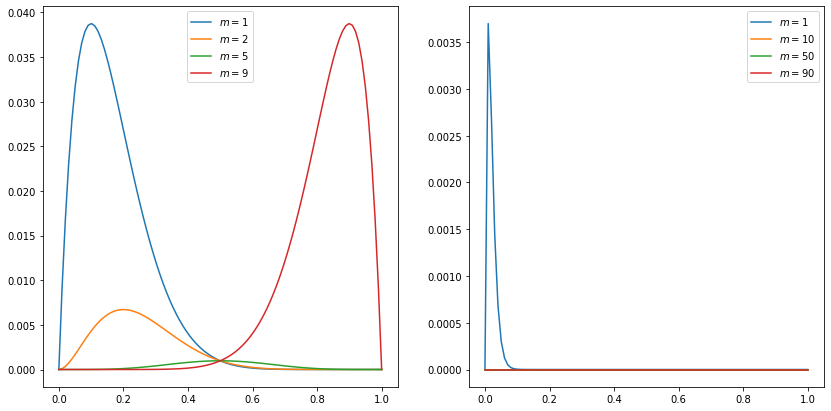

In [257]:
N1, m1 = 10, [1, 2, 5, 9]
N2, m2 = 100, [1, 10, 50, 90]

x = np.linspace(0, 1, 100)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

for m_i in m1: axs[0].plot(x, L(x, N1, m_i), label=f'$m = {m_i}$')
for m_i in m2: axs[1].plot(x, L(x, N2, m_i), label=f'$m = {m_i}$')

axs[0].legend()
axs[1].legend()
plt.show()

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

#### (c)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

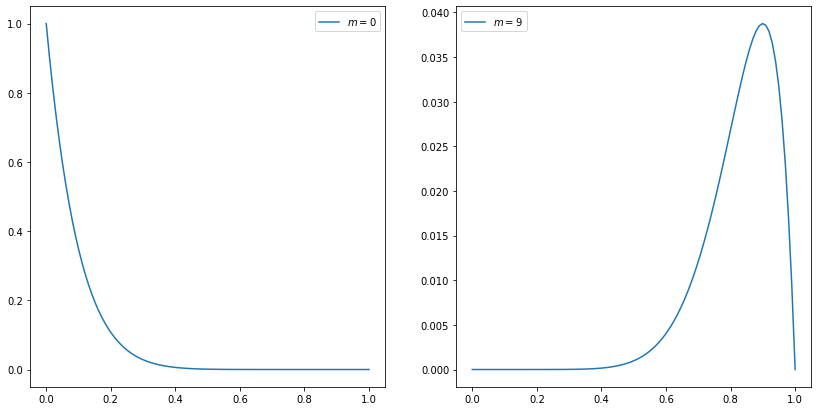

In [258]:
N, m = 10, [0, 9]
x = np.linspace(0, 1, 100)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].plot(x, L(x, N, m[0]), label=f'$m = 0$')
axs[1].plot(x, L(x, N, m[1]), label=f'$m = 9$')

axs[0].legend()
axs[1].legend()
plt.show()

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

### 2. Procjena maksimalne aposteriorne vjerojatnosti

#### (a)

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

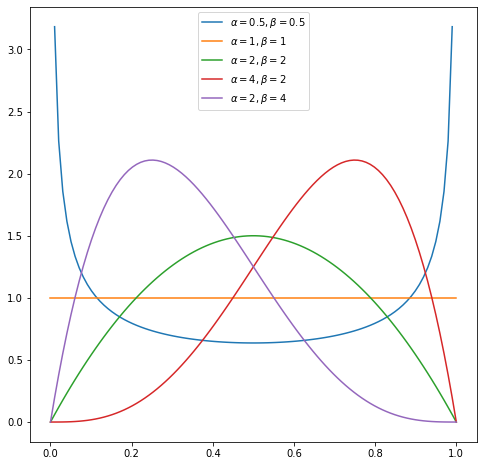

In [259]:
from scipy.stats import beta
l = [(0.5, 0.5), (1, 1), (2, 2), (4, 2), (2, 4)]
x = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 8))

for a, b in l:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=r'$\alpha = $'+ str(a) + r'$, \beta = $'+ str(b))

plt.legend()
plt.show()

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

#### (b)

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za $N=10$ i $m=9$ i nekolicinu kombinacija parametara $\alpha$ i $\beta$. 

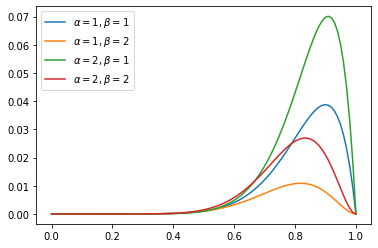

In [260]:
N = 10
m = 9

def p(x, N, m, a, b):
    return np.multiply(np.array(L(x, N, m)), beta.pdf(x, a, b))

x = np.linspace(0, 1, 100)
l = [1, 2]
for i in l:
    for j in l:
        y = p(x, N, m, i, j)
        plt.plot(x, y, label=r'$\alpha = $'+ str(i) + r'$, \beta = $'+ str(j))
plt.legend()
plt.show()

**Q**: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

#### (c)

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

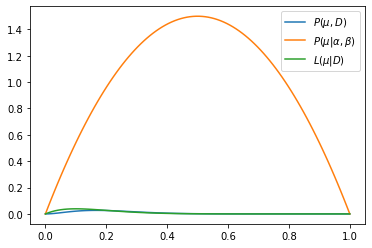

In [261]:
N, m = 10, 1
a, b = 2, 2

x = np.linspace(0, 1, 100)
p_ = np.array(p(x, N, m, a, b))
p_beta = beta.pdf(x, i, j)
l = L(x, N, m)

plt.plot(x, p_, label = f'$P(\mu, D)$')
plt.plot(x, p_beta, label = f'$P(\mu | $'+r'$\alpha, \beta)$')
plt.plot(x, l, label = f'$L(\mu | D)$')

plt.legend()
plt.show()

### 3. Analiza skupa podataka *Iris*

#### (a)

Učitajte skup podataka *Iris* korištenjem funkcije [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (**u nastavku radite isključivo s primjerima iz te jedne klase**). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

**NB:** Mogla bi Vam dobro dući funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

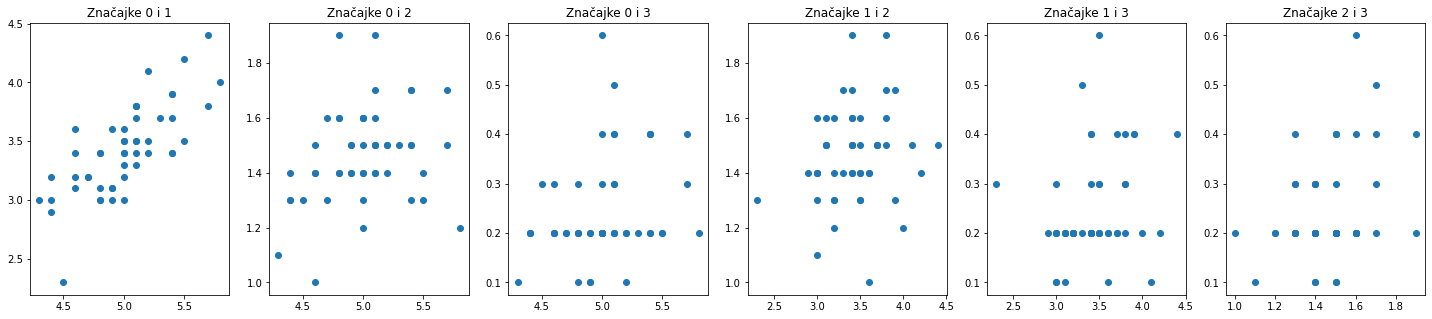

In [262]:
from numpy.lib.index_tricks import AxisConcatenator
from sklearn.datasets import load_iris
import itertools as it

iris = load_iris()
X, y = iris['data'], iris['target']

X_, y_ = X[y == 0], y[y == 0]

l = it.combinations([i for i in range(4)], 2)
fig, axs = plt.subplots(1, 6, figsize=(25, 5))

for n, (i, j) in enumerate(l):
    axs[n].scatter(X_[:, i], X_[:, j])
    axs[n].set_title(f'Značajke {i} i {j}')

plt.show()

#### (b)

Pogledajte opis modula [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

In [263]:
from scipy.stats import norm

def L_gauss(x, mi, sigma):
    return np.log(np.prod(norm.pdf(x, mi, sigma)))

#### (c)
Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

In [264]:
def mle_mu(x):
    return np.mean(x)

def mle_var(x):
    return np.mean((x - mle_mu(x))**2)

for i in range(4):
    x = X_[:, i]
    mu = mle_mu(x)
    var = mle_var(x)
    log_izglednost = L_gauss(x, mu, var**0.5)

    print(f'Značajka {i}:')
    print('mi: ', mu)
    print('var: ', var)
    print('Log izglednost:', log_izglednost, '\n')

Značajka 0:
mi:  5.006
var:  0.12176400000000002
Log izglednost: -18.305163312803863 

Značajka 1:
mi:  3.428
var:  0.14081600000000002
Log izglednost: -21.939396526466602 

Značajka 2:
mi:  1.4620000000000002
var:  0.029555999999999995
Log izglednost: 17.089786091159766 

Značajka 3:
mi:  0.24599999999999997
var:  0.010883999999999998
Log izglednost: 42.0646097912948 



#### (d)

Proučite funkciju [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [265]:
from scipy.stats import pearsonr

l = it.combinations([i for i in range(4)], 2)

for i, j in l:
    X_i, X_j = X_[:, i], X_[:, j]
    print(f'Pearsonov koeficijent korelacije - značajke {i} i {j}: {pearsonr(X_i, X_j)[0]}')

Pearsonov koeficijent korelacije - značajke 0 i 1: 0.7425466856651596
Pearsonov koeficijent korelacije - značajke 0 i 2: 0.26717575886875716
Pearsonov koeficijent korelacije - značajke 0 i 3: 0.27809835293596963
Pearsonov koeficijent korelacije - značajke 1 i 2: 0.17769996678227068
Pearsonov koeficijent korelacije - značajke 1 i 3: 0.23275201136287935
Pearsonov koeficijent korelacije - značajke 2 i 3: 0.33163004080411873


#### (e)

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika (srednja apsolutna i kvadratna) smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [266]:
print('Nepristrana ML-procjena kovarijacijske matrice:\n',
      np.cov(X_, rowvar=False, bias=False), '\n')

print('Pristrana ML-procjena kovarijacijske matrice:\n',
      np.cov(X_, rowvar=False, bias=True), '\n')

for i in [4, 2, 1]:
    cov_n = np.cov(X_[:len(X_)//i, :], rowvar=False, bias=False)
    cov_p = np.cov(X_[:len(X_)//i, :], rowvar=False, bias=True)
    print(f'Apsolutna razlika, N/{i} primjera: {np.mean(np.abs(cov_n - cov_p))}')
    print(f'Kvadratna razlika, N/{i} primjera: {np.mean((cov_n - cov_p)**2)}\n')

Nepristrana ML-procjena kovarijacijske matrice:
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]] 

Pristrana ML-procjena kovarijacijske matrice:
 [[0.121764 0.097232 0.016028 0.010124]
 [0.097232 0.140816 0.011464 0.009112]
 [0.016028 0.011464 0.029556 0.005948]
 [0.010124 0.009112 0.005948 0.010884]] 

Apsolutna razlika, N/4 primjera: 0.0023989898989899023
Kvadratna razlika, N/4 primjera: 1.293849160799922e-05

Apsolutna razlika, N/2 primjera: 0.0018493333333333304
Kvadratna razlika, N/2 primjera: 7.680071499999981e-06

Apsolutna razlika, N/1 primjera: 0.000768923469387749
Kvadratna razlika, N/1 primjera: 1.4518483236151334e-06

